In [112]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [113]:
mc_dataset = pd.read_csv("mcdonalds.csv")

In [114]:
mc_dataset.size

21795

In [115]:
mc_dataset.shape

(1453, 15)

In [116]:
mc_dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [117]:
list(mc_dataset)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [118]:
x = mc_dataset.iloc[:,:11]

In [119]:
y = x.iloc[:,0]

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = x.apply(le.fit_transform)

In [121]:
y.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [122]:
y.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [123]:
y.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_y = pca.fit_transform(y)

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_y = pca.fit_transform(y)

In [126]:
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721]


In [127]:
pca_y = pd.DataFrame(pca_y)
pca_y.head()

,0,1
0,0.425367,-0.219079
1,-0.218638,0.388190
2,0.375415,0.730435
3,-0.172926,-0.352752
4,0.187057,-0.807610


In [128]:
#using k-means

In [129]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters = i, init ="k-means++",random_state = 42)
    kmeans.fit(pca_y)
    
    wcss.append(kmeans.inertia_)
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [130]:
#plot the elbow graph

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

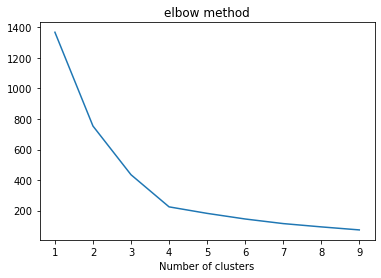

In [131]:
plt.plot(range(1,10),wcss)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylable("WCSS")
plt.show()

In [132]:
kmeans = KMeans(n_clusters=5,init= "k-means++",random_state = 42)
y_kmeans = kmeans.fit_predict(pca_y)

In [133]:
print(len(y_kmeans))


1453


In [134]:
pca_y.shape

(1453, 2)

In [135]:
pca_y.iloc[4,0]

0.18705739953185768

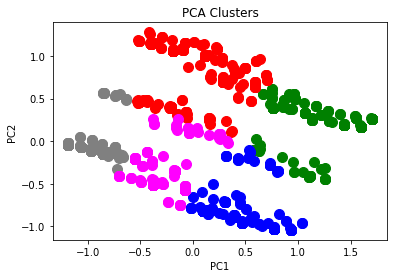

In [136]:
for i in range(0,1453):
    if y_kmeans[i]==0:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "grey", label = 'Cluster 1')
for i in range(0,1453):
    if y_kmeans[i]==1:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "green", label = 'Cluster 2')
        
for i in range(0,1453):
    if y_kmeans[i]==2:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "blue", label = 'Cluster 3')
        
for i in range(0,1453):
    if y_kmeans[i]==3:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "red", label = 'Cluster 4')
        
for i in range(0,1453):
    if y_kmeans[i]==4:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "magenta", label = 'Cluster 5')
        
        
plt.title('PCA Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.show()

In [137]:
#USING MIXTURE DISTRIBUTION

In [138]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5)
gm.fit(pca_y)
clusters = gm.predict(pca_y)
print(clusters)

[3 2 2 ... 2 0 3]


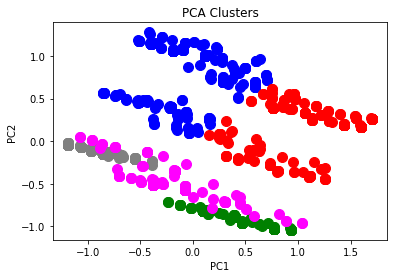

In [139]:
for i in range(0,1453):
    if clusters[i]==0:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "grey", label = 'Cluster 1')
for i in range(0,1453):
    if clusters[i]==1:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "green", label = 'Cluster 2')
        
for i in range(0,1453):
    if clusters[i]==2:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "blue", label = 'Cluster 3')
        
for i in range(0,1453):
    if clusters[i]==3:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "red", label = 'Cluster 4')
        
for i in range(0,1453):
    if clusters[i]==4:
        plt.scatter(pca_y.iloc[i,0], pca_y.iloc[i,1], s = 100, c = "magenta", label = 'Cluster 5')
        
        
plt.title('PCA Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.show()

In [140]:
#PROFILING SEGMENTS

In [141]:
k = mc_dataset.iloc[:,11:13]

In [142]:
for i in range(1,1453):
    if k.iloc[i,0]=="I hate it!-5":
        k.iloc[i,0] = -5
        
    elif k.iloc[i,0]=="I love it!+5":
        k.iloc[i,0] = 5

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
k = sc.fit_transform(k)

In [144]:
#USING K-MEANS

In [145]:
wcss2 = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters = i, init ="k-means++",random_state = 42)
    kmeans.fit(pca_y)
    
    wcss2.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

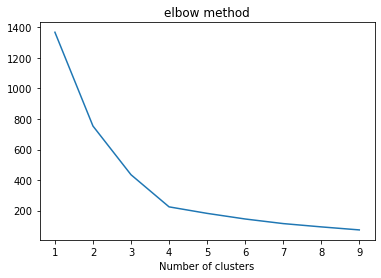

In [146]:
plt.plot(range(1,10),wcss2)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylable("WCSS")
plt.show()

In [147]:
kmeans = KMeans(n_clusters=4,init= "k-means++",random_state = 42)
k_kmeans = kmeans.fit_predict(k)

In [148]:
k_real = sc.inverse_transform(k)
k = pd.DataFrame(k_real)

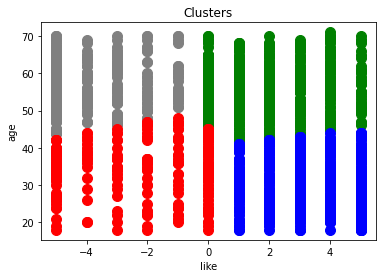

In [149]:
for i in range(0,1453):
    if k_kmeans[i]==0:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "grey", label = 'Cluster 1')
for i in range(0,1453):
    if k_kmeans[i]==1:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "green", label = 'Cluster 2')
        
for i in range(0,1453):
    if k_kmeans[i]==2:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "blue", label = 'Cluster 3')
        
for i in range(0,1453):
    if k_kmeans[i]==3:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "red", label = 'Cluster 4')
        
plt.title('Clusters')
plt.xlabel('like')
plt.ylabel('age')
#plt.legend()
plt.show()

In [150]:
#USING GaussianMixture

In [151]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4)
gm.fit(pca_y)
clusters = gm.predict(pca_y)
print(clusters)

[1 2 2 ... 2 0 1]


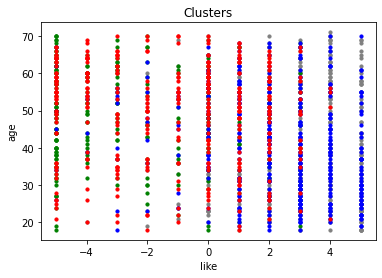

In [152]:
for i in range(0,1453):
    if clusters[i]==0:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 10, c = "grey", label = 'Cluster 1')
for i in range(0,1453):
    if clusters[i]==1:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 10, c = "green", label = 'Cluster 2')
        
for i in range(0,1453):
    if clusters[i]==2:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 10, c = "blue", label = 'Cluster 3')
        
for i in range(0,1453):
    if clusters[i]==3:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 10, c = "red", label = 'Cluster 4')
        
plt.title('Clusters')
plt.xlabel('like')
plt.ylabel('age')
#plt.legend()
plt.show()

In [153]:
k

,0,1
0,-3.0,61.0
1,2.0,51.0
2,1.0,62.0
3,4.0,69.0
4,2.0,49.0
...,...,...
1448,-5.0,47.0
1449,2.0,36.0
1450,3.0,52.0
1451,4.0,41.0


In [154]:
k.head()

,0,1
0,-3.0,61.0
1,2.0,51.0
2,1.0,62.0
3,4.0,69.0
4,2.0,49.0


In [155]:
#training regression model

In [156]:
a = k.iloc[:,0]
b = k.iloc[:,1]

In [157]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [158]:
b_train = np.array(b_train)
a_train = np.array(a_train)
a_test = np.array(a_test)
b_test = np.array(b_test)

In [159]:
b_train = b_train.reshape(-1,1)
a_train = a_train.reshape(-1,1)

In [160]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(a_train,b_train )

LinearRegression()

In [161]:
a_test = a_test.reshape(-1,1)
b_test = b_test.reshape(-1,1)

In [162]:
L = reg.predict(a_train)

In [163]:
reg.score(a_test,b_test)

0.059062227594723904

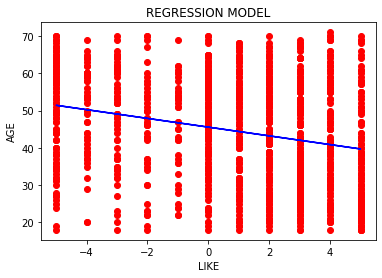

In [164]:
plt.scatter(a_train,b_train,c="red")
plt.plot(a_train,L,c="blue")
plt.title("REGRESSION MODEL")
plt.xlabel("LIKE")
plt.ylabel("AGE")
plt.show()

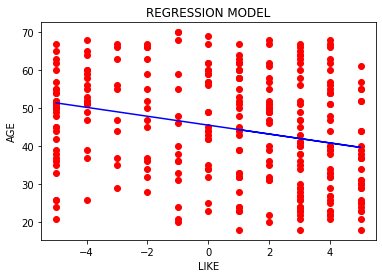

In [165]:
plt.scatter(a_test,b_test,c="red")
plt.plot(a_test,reg.predict(a_test),c="blue")
plt.title("REGRESSION MODEL")
plt.xlabel("LIKE")
plt.ylabel("AGE")
plt.show()

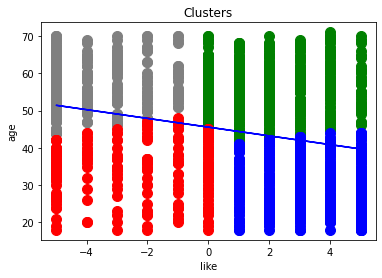

In [166]:
for i in range(0,1453):
    if k_kmeans[i]==0:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "grey", label = 'Cluster 1')
for i in range(0,1453):
    if k_kmeans[i]==1:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "green", label = 'Cluster 2')
        
for i in range(0,1453):
    if k_kmeans[i]==2:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "blue", label = 'Cluster 3')
        
for i in range(0,1453):
    if k_kmeans[i]==3:
        plt.scatter(k.iloc[i,0], k.iloc[i,1], s = 100, c = "red", label = 'Cluster 4')
        
plt.plot(a_train,L,c="blue")
plt.title('Clusters')
plt.xlabel('like')
plt.ylabel('age')
#plt.legend()
plt.show()

In [ ]:
#Hence we can conclude that younger people usally tends to like the product